In [147]:
import tensorflow as tf

In [158]:
from keras import models, layers, optimizers

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn import preprocessing

import pandas as pd
import numpy as np

In [159]:
imdb_df = pd.read_csv('IMDB Dataset.csv')

In [160]:
train_df = imdb_df.sample(frac=0.8, random_state=42)
test_df = imdb_df.drop(train_df.index)

In [161]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'].to_list())

train_seq = tokenizer.texts_to_sequences(train_df['review'].tolist())
test_seq = tokenizer.texts_to_sequences(test_df['review'].tolist())

max_len = 200
train_data = pad_sequences(train_seq, maxlen=max_len)
test_data = pad_sequences(test_seq, maxlen=max_len)

label_encoder = preprocessing.LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['sentiment'])
test_labels = label_encoder.fit_transform(test_df['sentiment'])

In [169]:
model = models.Sequential([
    tf.keras.layers.Embedding(100000, 64, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 64)           6400000   
                                                                 
 flatten_6 (Flatten)         (None, 12800)             0         
                                                                 
 dense_18 (Dense)            (None, 32)                409632    
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6,810,177
Trainable params: 6,810,177
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [176]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/10
1250/1250 [==============================] - 118s 94ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.9013 - val_accuracy: 0.8571
Epoch 2/10
1250/1250 [==============================] - 113s 91ms/step - loss: 7.3495e-04 - accuracy: 0.9998 - val_loss: 1.1132 - val_accuracy: 0.8575
Epoch 3/10
1250/1250 [==============================] - 115s 92ms/step - loss: 2.9775e-05 - accuracy: 1.0000 - val_loss: 1.1701 - val_accuracy: 0.8580
Epoch 4/10
1250/1250 [==============================] - 115s 92ms/step - loss: 3.6919e-06 - accuracy: 1.0000 - val_loss: 1.2045 - val_accuracy: 0.8577
Epoch 5/10
1250/1250 [==============================] - 116s 93ms/step - loss: 1.9013e-06 - accuracy: 1.0000 - val_loss: 1.2421 - val_accuracy: 0.8574
Epoch 6/10
1250/1250 [==============================] - 109s 87ms/step - loss: 1.0587e-06 - accuracy: 1.0000 - val_loss: 1.2840 - val_accuracy: 0.8572
Epoch 7/10
1250/1250 [==============================] - 114s 91ms/step - loss: 5.8122e-07 - accura

In [177]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test loss: {test_loss:.2f}, Test accuracy: {test_accuracy:.2%}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4796 - accuracy: 0.8572
Test loss: 1.48, Test accuracy: 85.72%


Text(0.5, 1.0, 'Loss evolution')

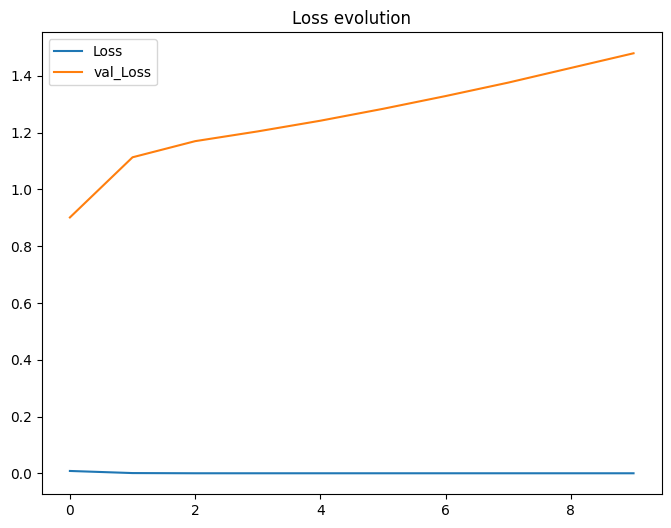

In [178]:
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy evolution')

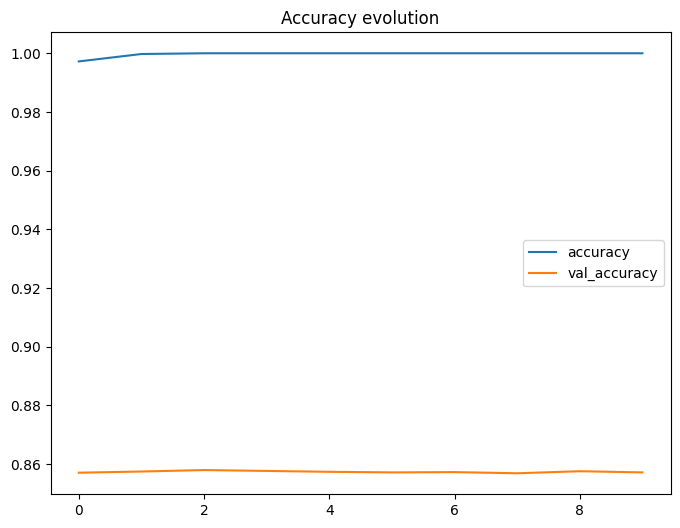

In [179]:
plt.figure(figsize=(8, 6))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [181]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [182]:
print(predictions[6], test_labels[6])

[0.1520972] 0
